In [1]:
import numpy as np # linear algebra
import pandas as pd 
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt  # Matlab-style plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
sns.set(style='white', context='notebook', palette='deep')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
Random_state=42
np.random.seed(0)
pd.set_option('display.max_columns', None)

In [2]:

#Models import
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#import imputer:
from sklearn.impute import KNNImputer
#score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier

In [122]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [134]:
dataset=pd.read_csv("C:/Users/user/Documents/startup data.csv",\
                    converters={'status': lambda x: int(x == 'acquired')},\
                    parse_dates=['founded_at','first_funding_at','last_funding_at','closed_at'])

In [135]:
df=dataset.copy()

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                923 non-null    int64         
 1   state_code                923 non-null    object        
 2   latitude                  923 non-null    float64       
 3   longitude                 923 non-null    float64       
 4   zip_code                  923 non-null    object        
 5   id                        923 non-null    object        
 6   city                      923 non-null    object        
 7   Unnamed: 6                430 non-null    object        
 8   name                      923 non-null    object        
 9   labels                    923 non-null    int64         
 10  founded_at                923 non-null    datetime64[ns]
 11  closed_at                 335 non-null    datetime64[ns]
 12  first_funding_at      

In [137]:
dataset.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [138]:
df.drop(columns = ['Unnamed: 0', 'id', 'Unnamed: 6', 'name'], inplace=True)
df.shape

(923, 45)

In [139]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

state_code        35
zip_code         382
city             221
state_code.1      35
category_code     35
object_id        922
dtype: int64

In [140]:
# Drop column with unique value higher than 100 except for date time column
df.drop(columns = ['zip_code', 'city', 'object_id'], inplace = True)
df.shape

(923, 42)

In [141]:
#extract only year
df['founded_at'] = df['founded_at'].dt.year
df['closed_at'] = df['closed_at'].dt.year
df['first_funding_at'] = df['first_funding_at'].dt.year
df['last_funding_at'] = df['last_funding_at'].dt.year

Segment the Category Code into Smaller Unique Value

In [142]:
df.category_code.unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [143]:
def segment_category(category):
    if category in ['music', 'games_video', 'photo_video', 'entertainment']:
        return 'Entertainment'
    elif category in ['enterprise', 'web', 'software', 'network_hosting', 'hardware', 'tech']:
        return 'Technology'
    elif category in ['finance', 'mobile', 'ecommerce', 'advertising', 'business']:
        return 'Business'
    elif category in ['education', 'public_relations', 'security']:
        return 'Education & PR'
    elif category in ['travel', 'fashion', 'hospitality', 'transportation']:
        return 'Lifestyle'
    elif category in ['analytics', 'consulting']:
        return 'Consulting & Analytics'
    elif category in ['biotech', 'cleantech', 'search', 'semiconductor', 'medical', 'health']:
        return 'Science & Health'
    else:
        return 'Other'
    

# Apply the segmentation function to each category code
df['category_segment'] = df['category_code'].apply(segment_category)

[Text(0, 0, '431'),
 Text(0, 0, '172'),
 Text(0, 0, '114'),
 Text(0, 0, '65'),
 Text(0, 0, '52'),
 Text(0, 0, '48'),
 Text(0, 0, '22'),
 Text(0, 0, '19')]

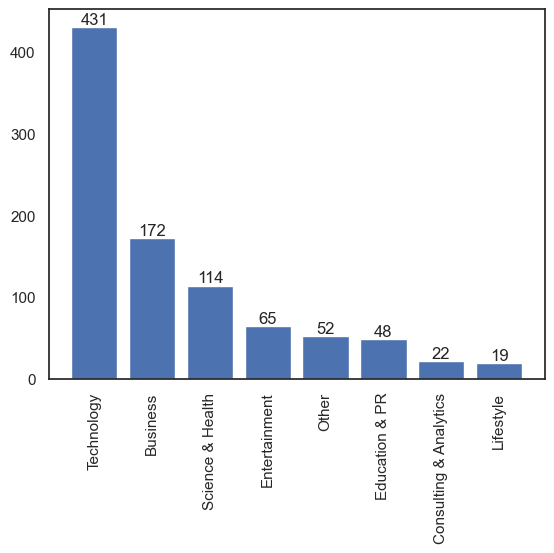

In [144]:
fig, ax = plt.subplots()
indexes=df['category_segment'].value_counts().index.tolist()
values=df['category_segment'].value_counts()
plt.xticks( rotation='vertical')
bars = ax.bar(indexes, values)
ax.bar_label(bars)

In [145]:
# Drop category_code column
df.drop(columns = 'category_code', inplace=True)
df.head()

,state_code,latitude,longitude,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_segment
0,CA,42.358880,-71.056820,1,2007,NaN,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,Entertainment
1,CA,37.238916,-121.973718,1,2000,NaN,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,Technology
2,CA,32.901049,-117.192656,1,2009,NaN,2010,2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,Technology
3,CA,37.320309,-122.050040,1,2002,NaN,2005,2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,Technology
4,CA,37.779281,-122.419236,0,2010,2012.0,2010,2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,Entertainment


Exploratory Data Analysis

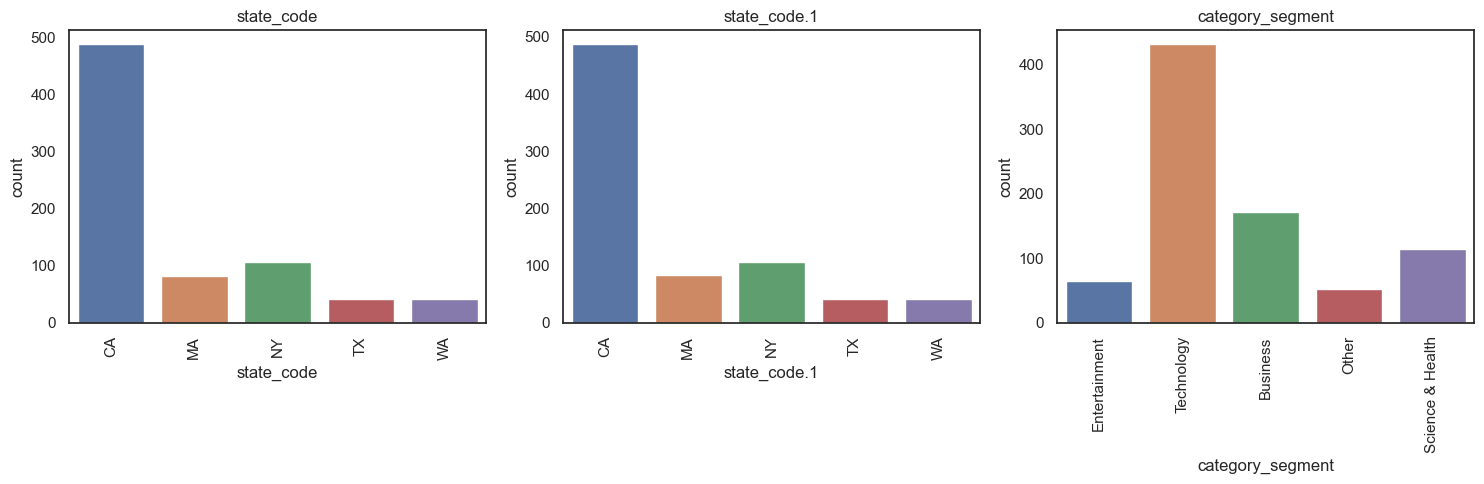

In [146]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 5 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(5).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

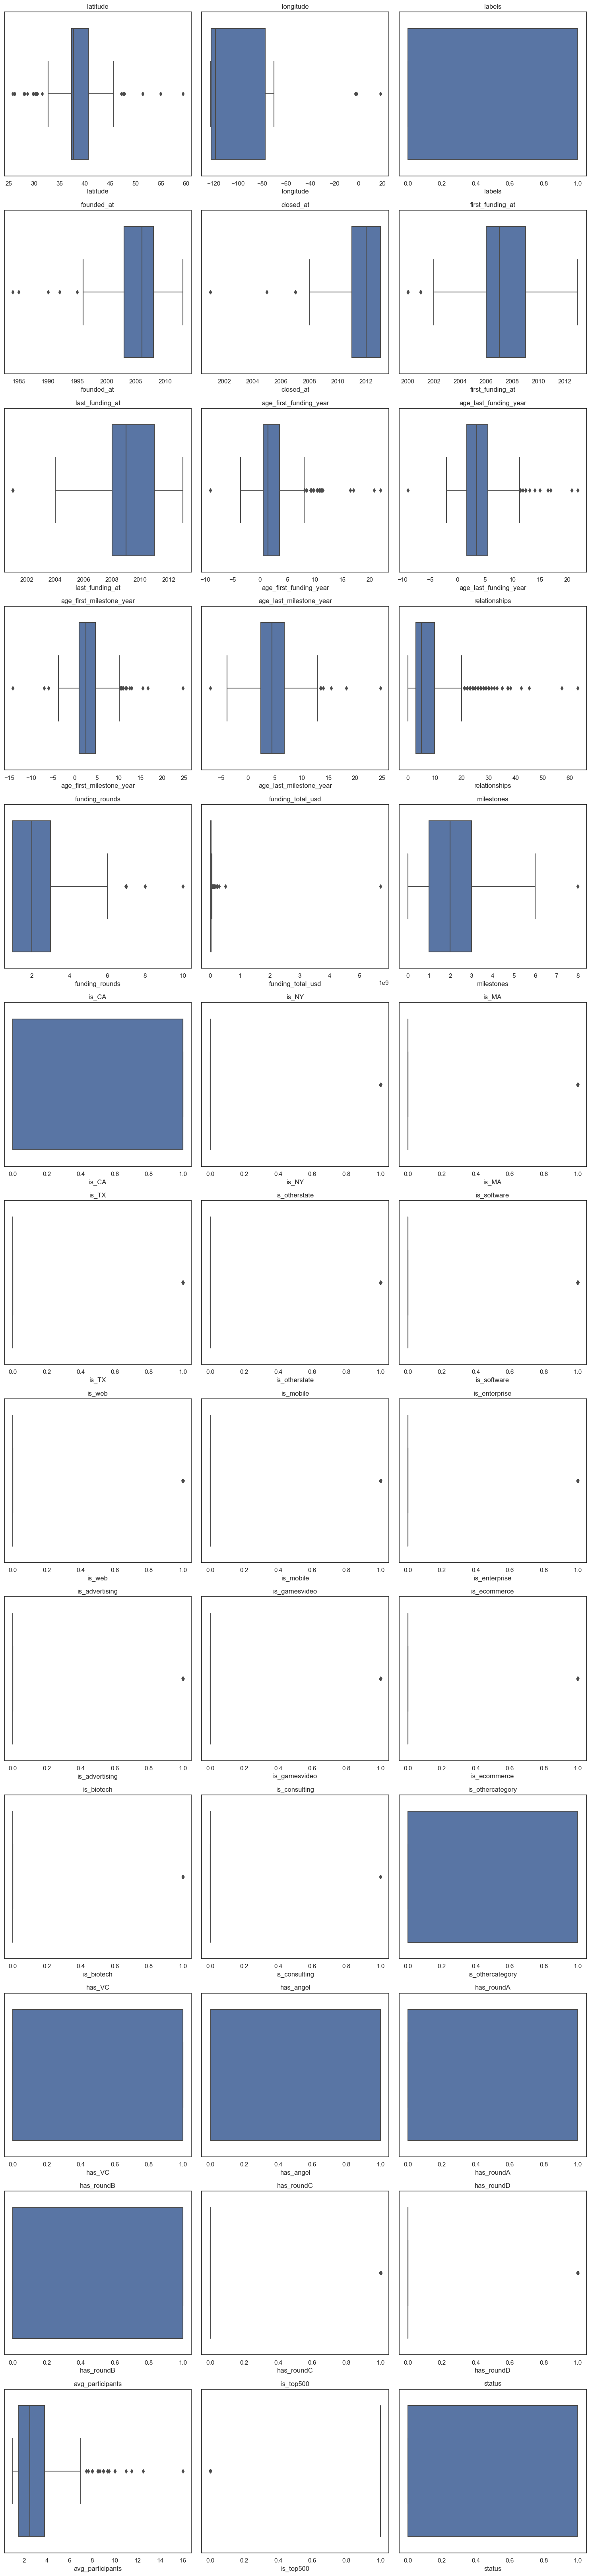

In [147]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

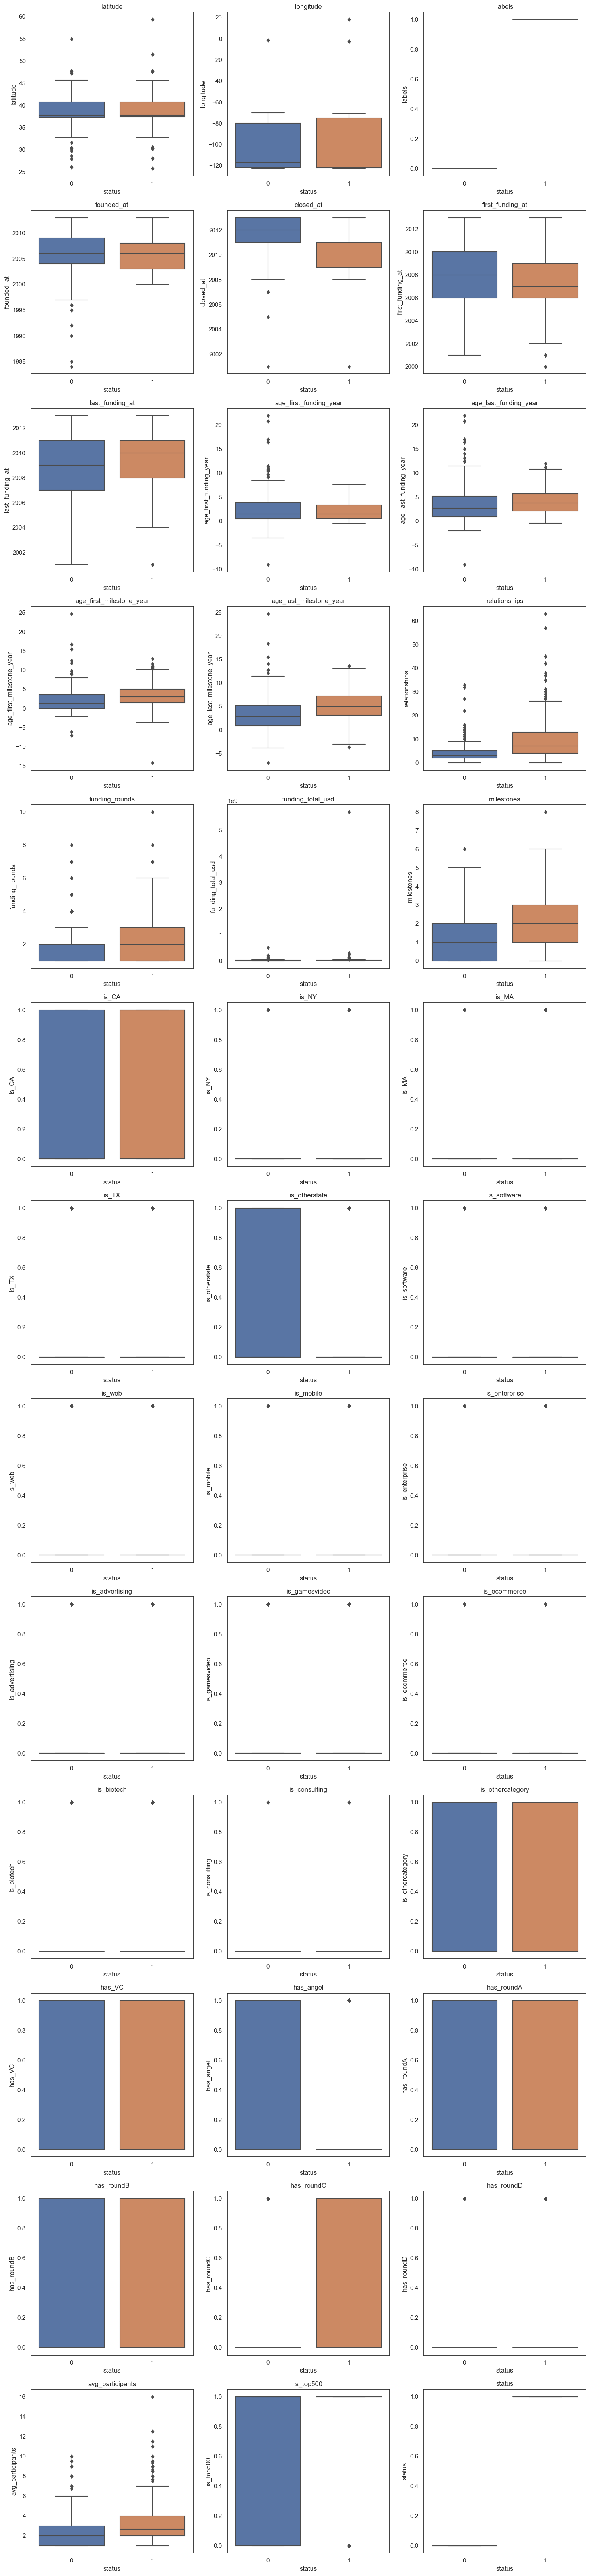

In [148]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='status', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

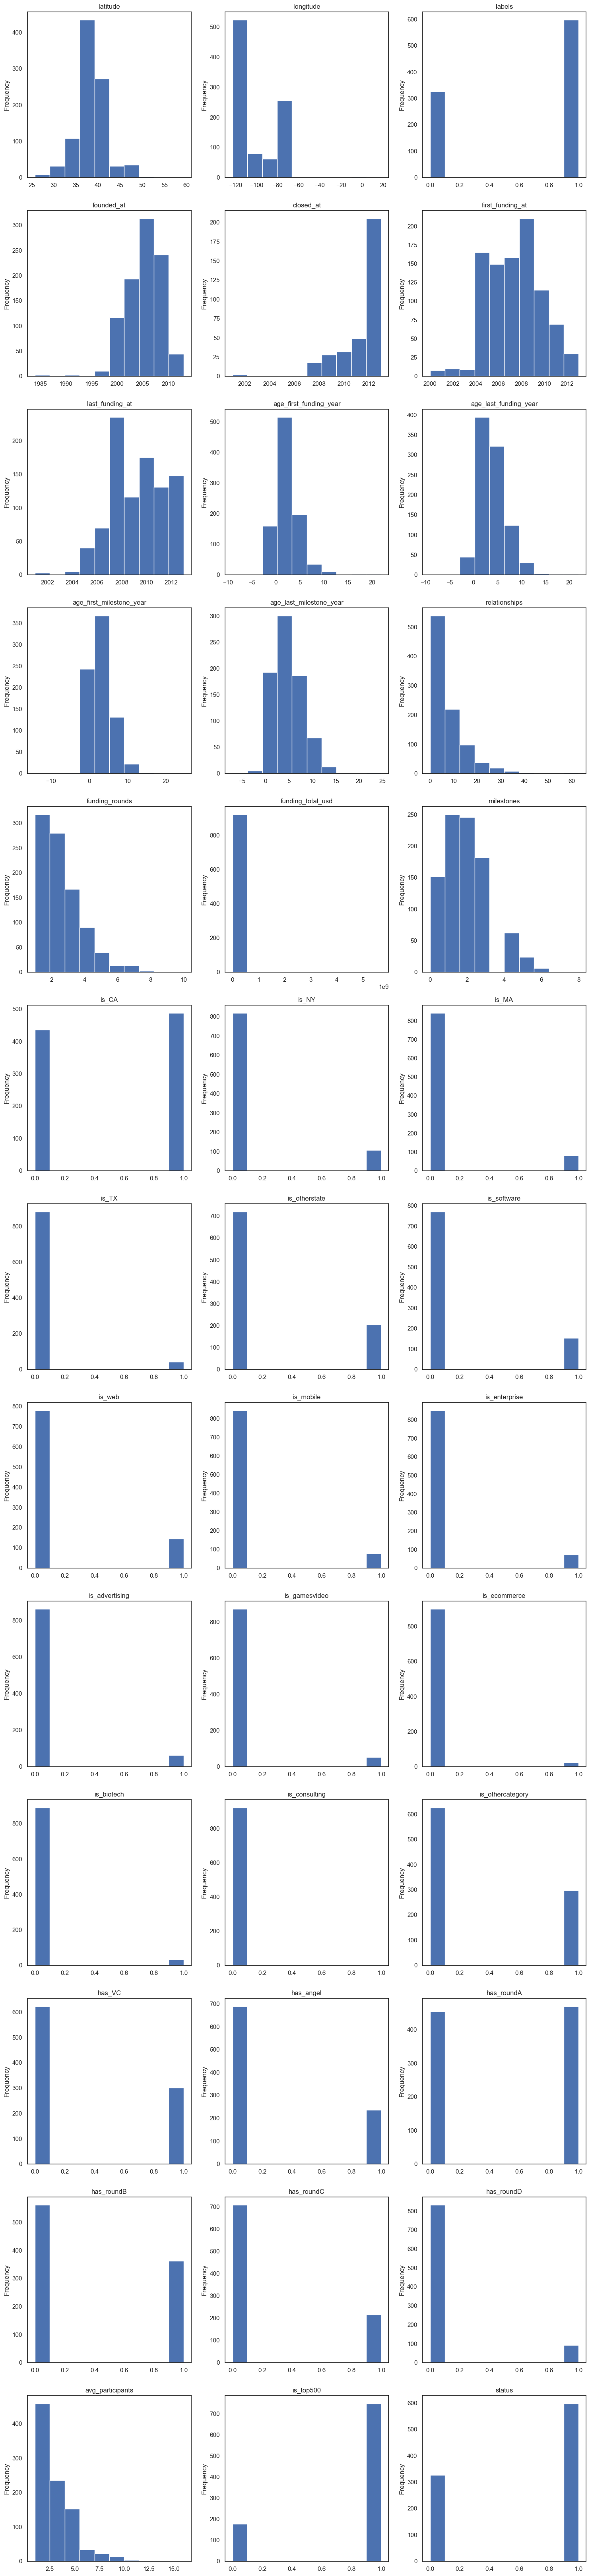

In [149]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

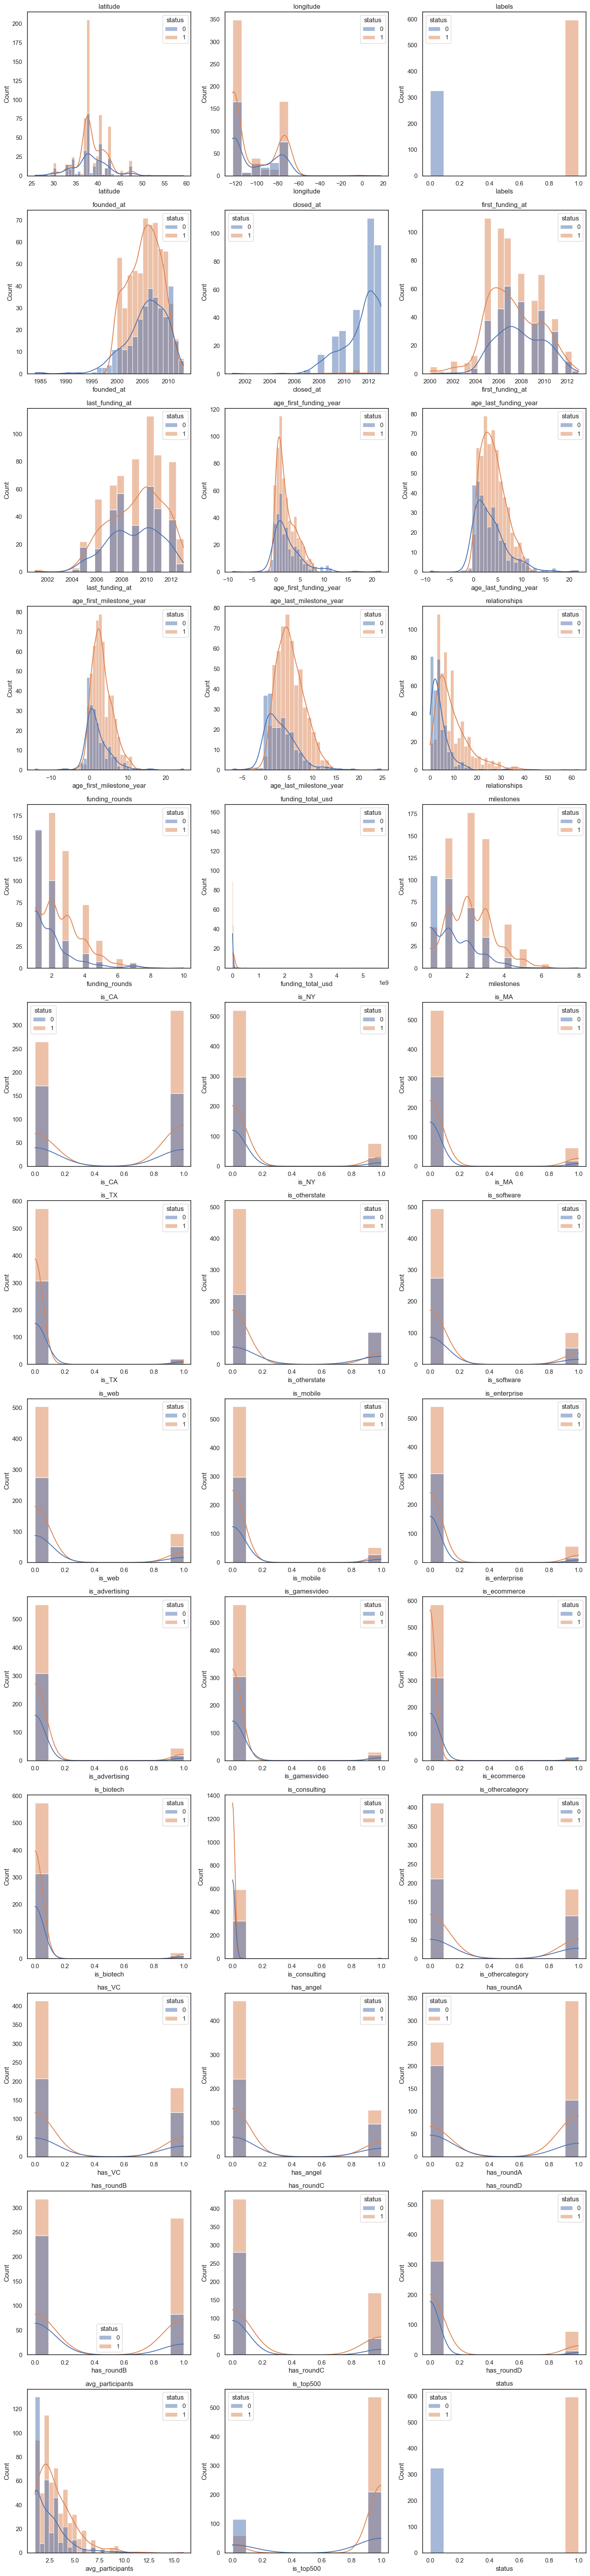

In [150]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='status', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

Data Preprocessing Part 2

In [151]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

closed_at                   63.705309
age_first_milestone_year    16.468039
age_last_milestone_year     16.468039
state_code.1                 0.108342
dtype: float64

In [152]:
print(df.isnull().sum())

state_code                    0
latitude                      0
longitude                     0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

#KNN imputer

In [153]:
def imputing_numeric_missing_values(dataset,n_neighbors=10):
    numerical_column_names = dataset.select_dtypes([np.number]).columns
    knn= KNNImputer()
    knn_dataset= knn.fit_transform(dataset[numerical_column_names])
    
    dataset[numerical_column_names]=pd.DataFrame(knn_dataset)
    return dataset

dataset=imputing_numeric_missing_values(df)

numerical_df_3=dataset.select_dtypes(int)

# Check for Null values
print(df.isnull().sum())

state_code                  0
latitude                    0
longitude                   0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                1
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel 

Label Encoder

In [154]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

state_code: ['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' 'AZ' 'ID' 'AR' 'WI']
state_code.1: ['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' nan 'AZ' 'ID' 'AR' 'WI']
category_segment: ['Entertainment' 'Technology' 'Business' 'Education & PR' 'Other'
 'Lifestyle' 'Consulting & Analytics' 'Science & Health']


In [155]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

state_code: [ 2 12 11 23  3 31 29 32  9 18 26  7 19 17  6 20 34 15  5  4 13 24 28 16
 27 25 30 14 22 21 10  1  8  0 33]
state_code.1: [ 2 12 11 23  3 31 29 32  9 18 26  7 19 17  6 20 34 15  5  4 13 24 28 16
 27 25 30 14 22 21 10 35  1  8  0 33]
category_segment: [3 7 0 2 5 4 1 6]


<Axes: >

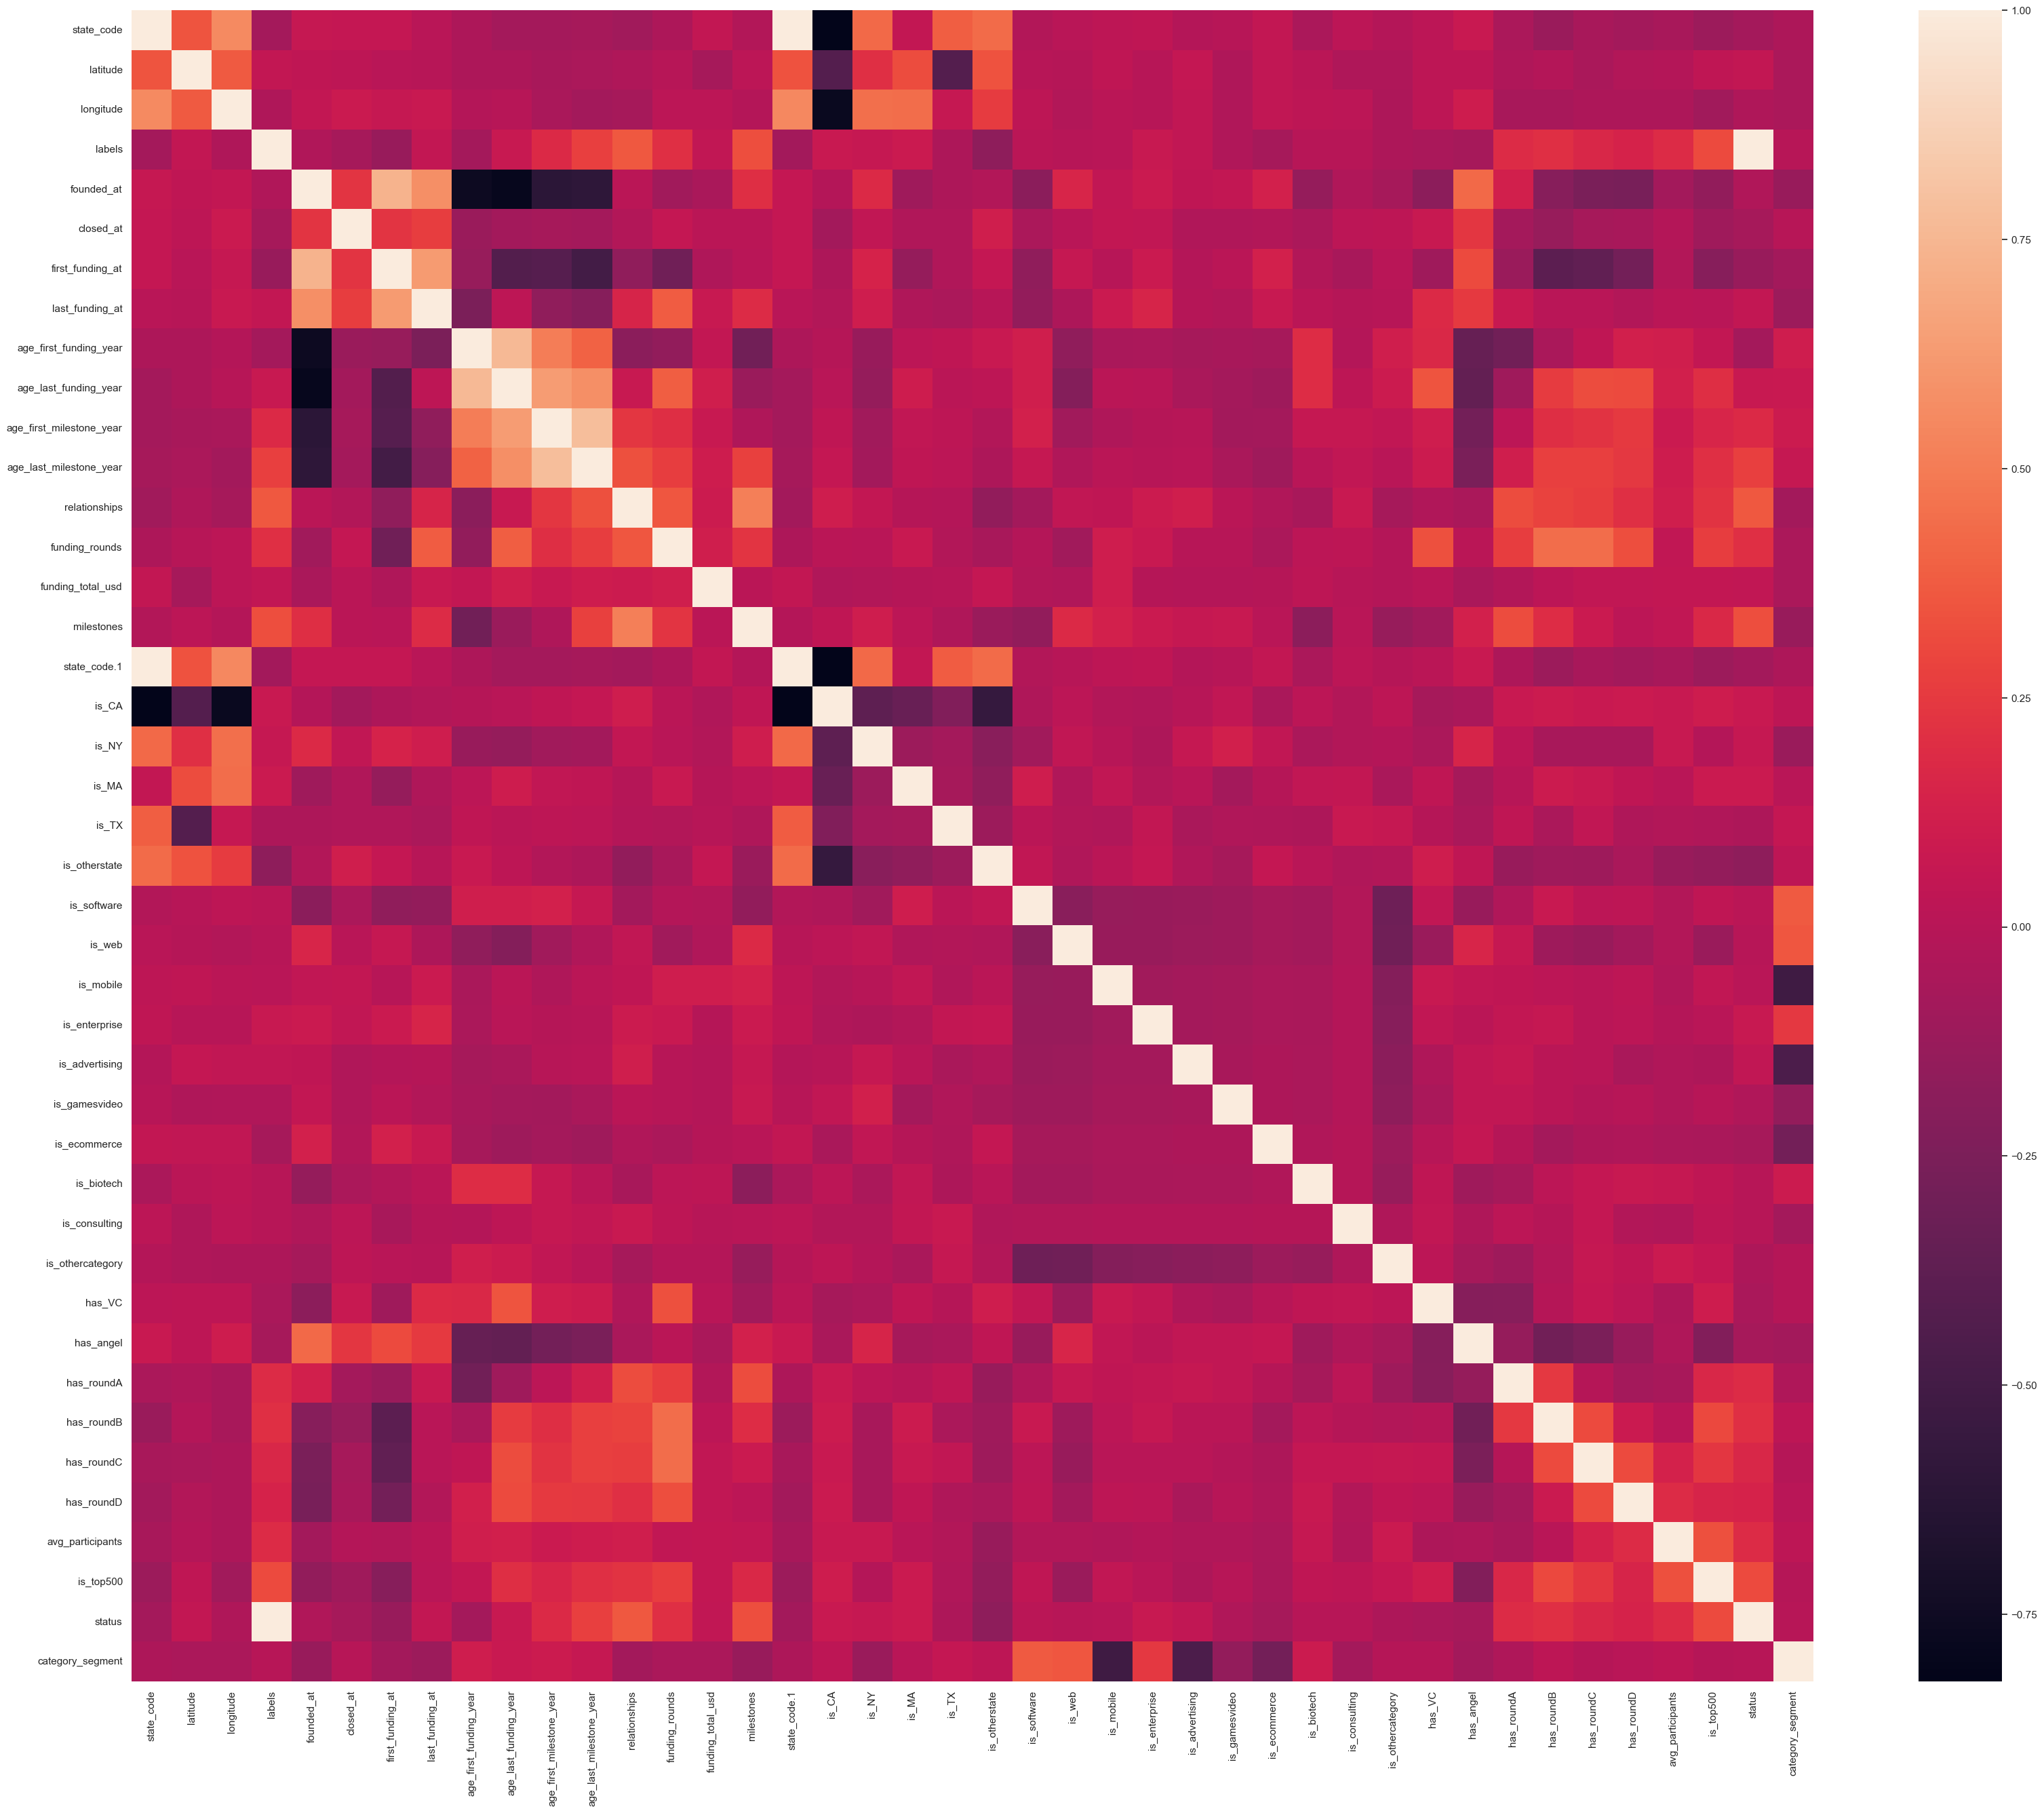

In [156]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=False)

In [157]:
df.drop(columns = ['state_code.1', 'labels', 'founded_at', 'closed_at'], inplace=True)
df.shape

(923, 38)

In [158]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'category_segment'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    int32  
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   first_funding_at          923 non-null    float64
 4   last_funding_at           923 non-null    float64
 5   age_first_funding_year    923 non-null    float64
 6   age_last_funding_year     923 non-null    float64
 7   age_first_milestone_year  923 non-null    float64
 8   age_last_milestone_year   923 non-null    float64
 9   relationships             923 non-null    float64
 10  funding_rounds            923 non-null    float64
 11  funding_total_usd         923 non-null    float64
 12  milestones                923 non-null    float64
 13  is_CA                     923 non-null    float64
 14  is_NY     

Train Test Split

In [160]:
X = df.drop('status', axis=1)
y = df['status']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [161]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBClassifier"]})



[Text(0, 0, '0.646335'),
 Text(0, 0, '0.687005'),
 Text(0, 0, '0.695076'),
 Text(0, 0, '0.802129'),
 Text(0, 0, '0.758719'),
 Text(0, 0, '0.789837'),
 Text(0, 0, '0.589226'),
 Text(0, 0, '0.631396'),
 Text(0, 0, '0.646335'),
 Text(0, 0, '0.739837'),
 Text(0, 0, '0.76418')]

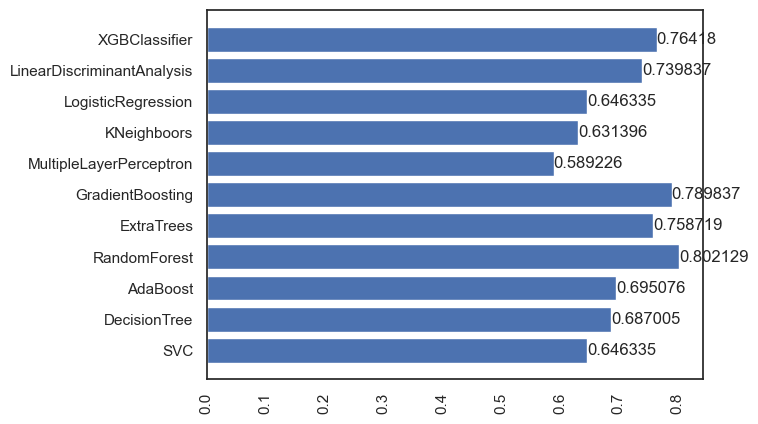

In [162]:
fig, ax = plt.subplots()
values=cv_res['CrossValMeans']
indexes=cv_res['Algorithm']
plt.xticks( rotation='vertical')
bars = ax.barh(indexes, values)
ax.bar_label(bars)

chossing XGBClassifier, GradientBoosting and RandomForest

In [163]:
best_classifiers=[]


# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [1,2,4],
              "max_features": [1, 10,100,1000],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_
best_classifiers.append(RFC_best)

# Best score

RandomForests_score= gsRFC.best_score_

print(f' RandomForests score is :{RandomForests_score}')

# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,1000],
              'learning_rate': [0.001,0.1, 0.05, 0.01,1,10],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_
best_classifiers.append(GBC_best)

# Best score

GradientBoosting_score= gsGBC.best_score_

print(f' GradientBoosting score is :{GradientBoosting_score}')


#XGB
xgb=XGBClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}
# Perform a grid search with cross-validation to find the best hyperparameters
gsxgb = GridSearchCV(xgb, param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsxgb.fit(X_train, y_train)
XGB_best = gsxgb.best_estimator_
best_classifiers.append(XGB_best)

# Best score

XGBoost_score= gsxgb.best_score_

print(f' XtremeGradientBoosting score is :{XGBoost_score}')

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
 RandomForests score is :0.8021103295075898
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
 GradientBoosting score is :0.7886153276564236
Fitting 10 folds for each of 54 candidates, totalling 540 fits
 XtremeGradientBoosting score is :0.7939837097371344


In [164]:
def plotly_scatterplots(model_importances,model_title):
    trace = go.Scatter(
        y = feature_dataframe[model_importances].values,
        x = feature_dataframe['features'].values,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 25,
    #       size= feature_dataframe['AdaBoost feature importances'].values,
            #color = np.random.randn(500), #set color equal to a variable
            color = feature_dataframe[model_importances].values,
            colorscale='Portland',
            showscale=True
        ),
        text = feature_dataframe['features'].values
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= model_title,
        hovermode= 'closest',
    #     xaxis= dict(
    #         title= 'Pop',
    #         ticklen= 5,
    #         zeroline= False,
    #         gridwidth= 2,
    #     ),
        yaxis=dict(
            title= 'Feature Importance',
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename='scatter2010')

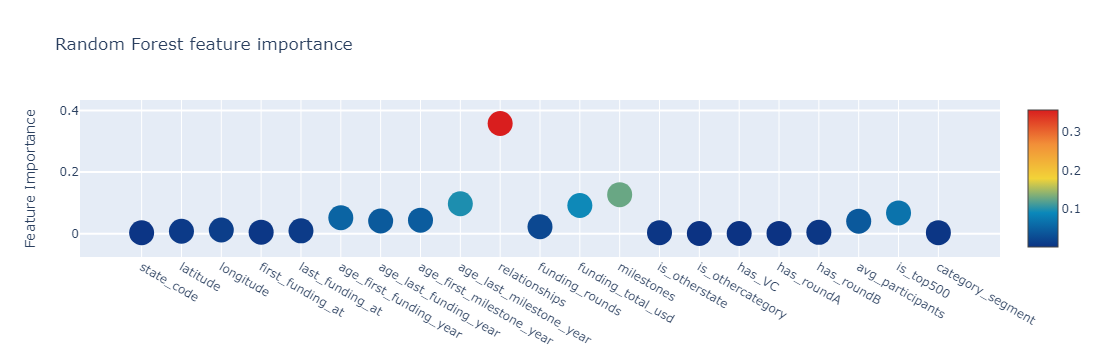

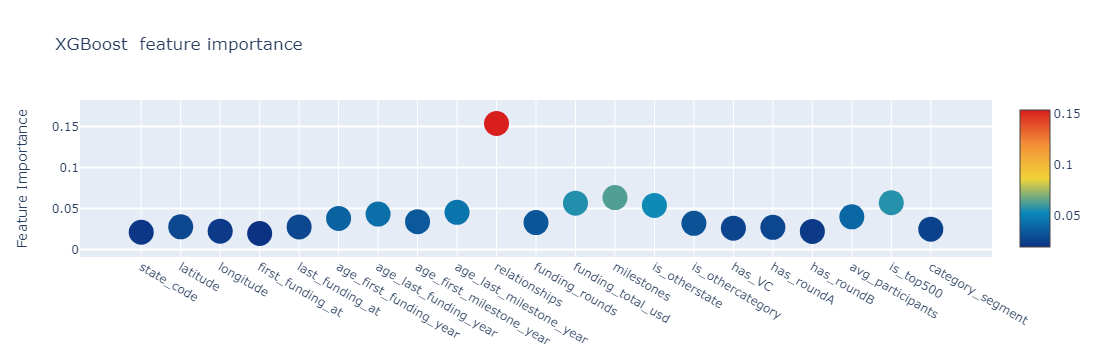

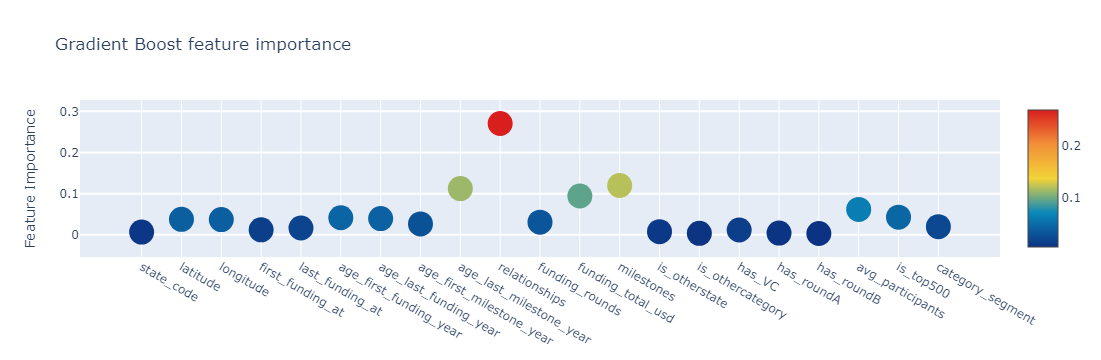

In [165]:
# Create a dataframe with features

cols = X_train.columns.values

rf_feature = RFC_best.feature_importances_
xgb_feature = XGB_best.feature_importances_
gb_feature = GBC_best.feature_importances_

feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_feature,
     'XGBoost  feature importances': xgb_feature,
    'Gradient Boost feature importances': gb_feature
    })
feature_dataframe = feature_dataframe[feature_dataframe.astype(bool).sum(axis=1) > feature_dataframe.shape[1]/(1.2)]
model_importances=['Random Forest feature importances','XGBoost  feature importances','Gradient Boost feature importances']
model_title=['Random Forest feature importance','XGBoost  feature importance','Gradient Boost feature importance']

for importances,title in zip(model_importances,model_title):
    
    plotly_scatterplots(importances,title)

In [170]:
feature_dataframe['mean'] = feature_dataframe[['Random Forest feature importances',
       'XGBoost  feature importances', 'Gradient Boost feature importances']].mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,features,Random Forest feature importances,XGBoost feature importances,Gradient Boost feature importances,mean
0,state_code,0.002998,0.021180,0.006507,0.010229
1,latitude,0.007928,0.027806,0.037597,0.024444
2,longitude,0.011913,0.022512,0.036960,0.023795


In [171]:
def mean_bar_plot(feature_dataframe):
    y = feature_dataframe['mean'].values
    x = feature_dataframe['features'].values
    data = [go.Bar(
                x= x,
                 y= y,
                width = 0.5,
                marker=dict(
                   color = feature_dataframe['mean'].values,
                colorscale='Portland',
                showscale=True,
                reversescale = False
                ),
                opacity=0.6
            )]

    layout= go.Layout(
        autosize= True,
        title= 'Barplots of Mean Feature Importance',
        hovermode= 'closest',
    #     xaxis= dict(
    #         title= 'Pop',
    #         ticklen= 5,
    #         zeroline= False,
    #         gridwidth= 2,
    #     ),
        yaxis=dict(
            title= 'Feature Importance',
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='bar-direct-labels')

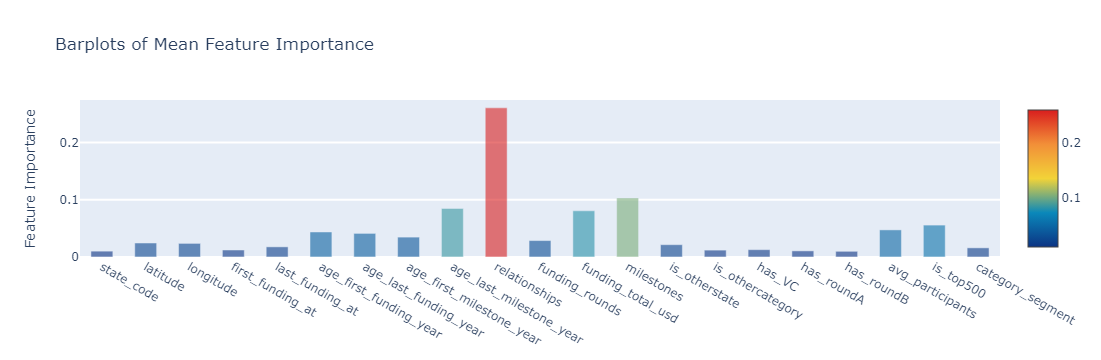

In [172]:
mean_bar_plot(feature_dataframe)

Plot Learning Curves

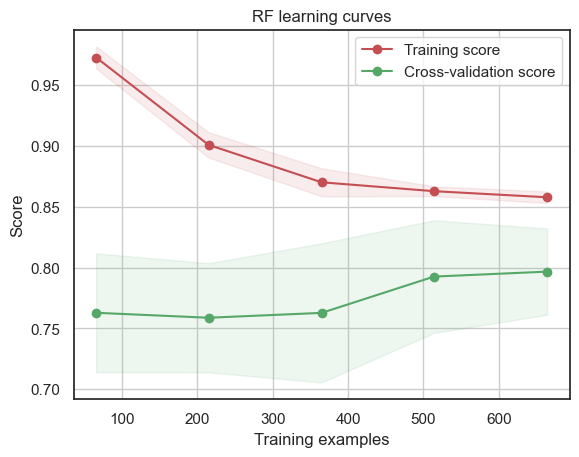

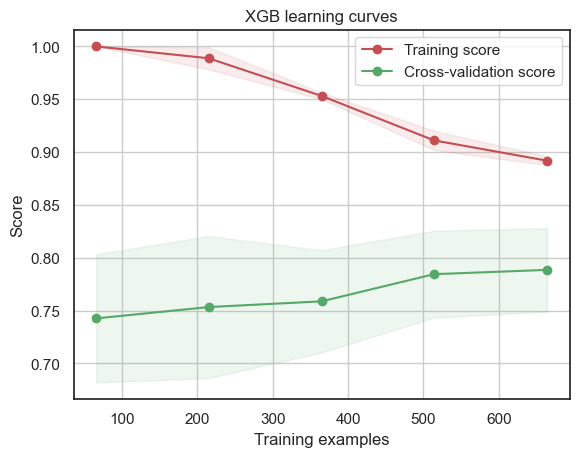

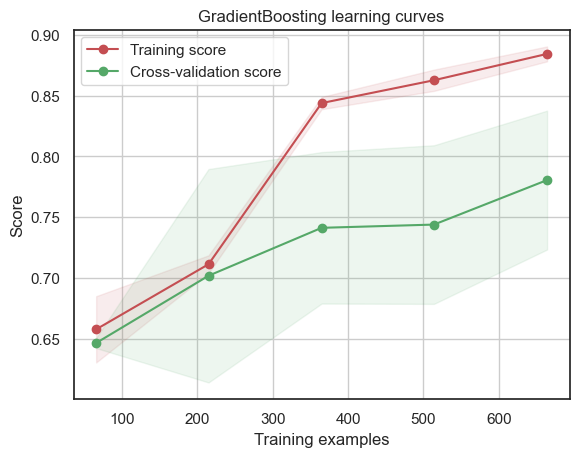

In [175]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

    plt.legend(loc="best")
    return plt


g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,y_train,cv=kfold)
plt.show()
g = plot_learning_curve(gsxgb.best_estimator_,"XGB learning curves",X_train,y_train,cv=kfold)
plt.show()
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)
plt.show()


Feature importance of tree based classifiers

IndexError: list index out of range

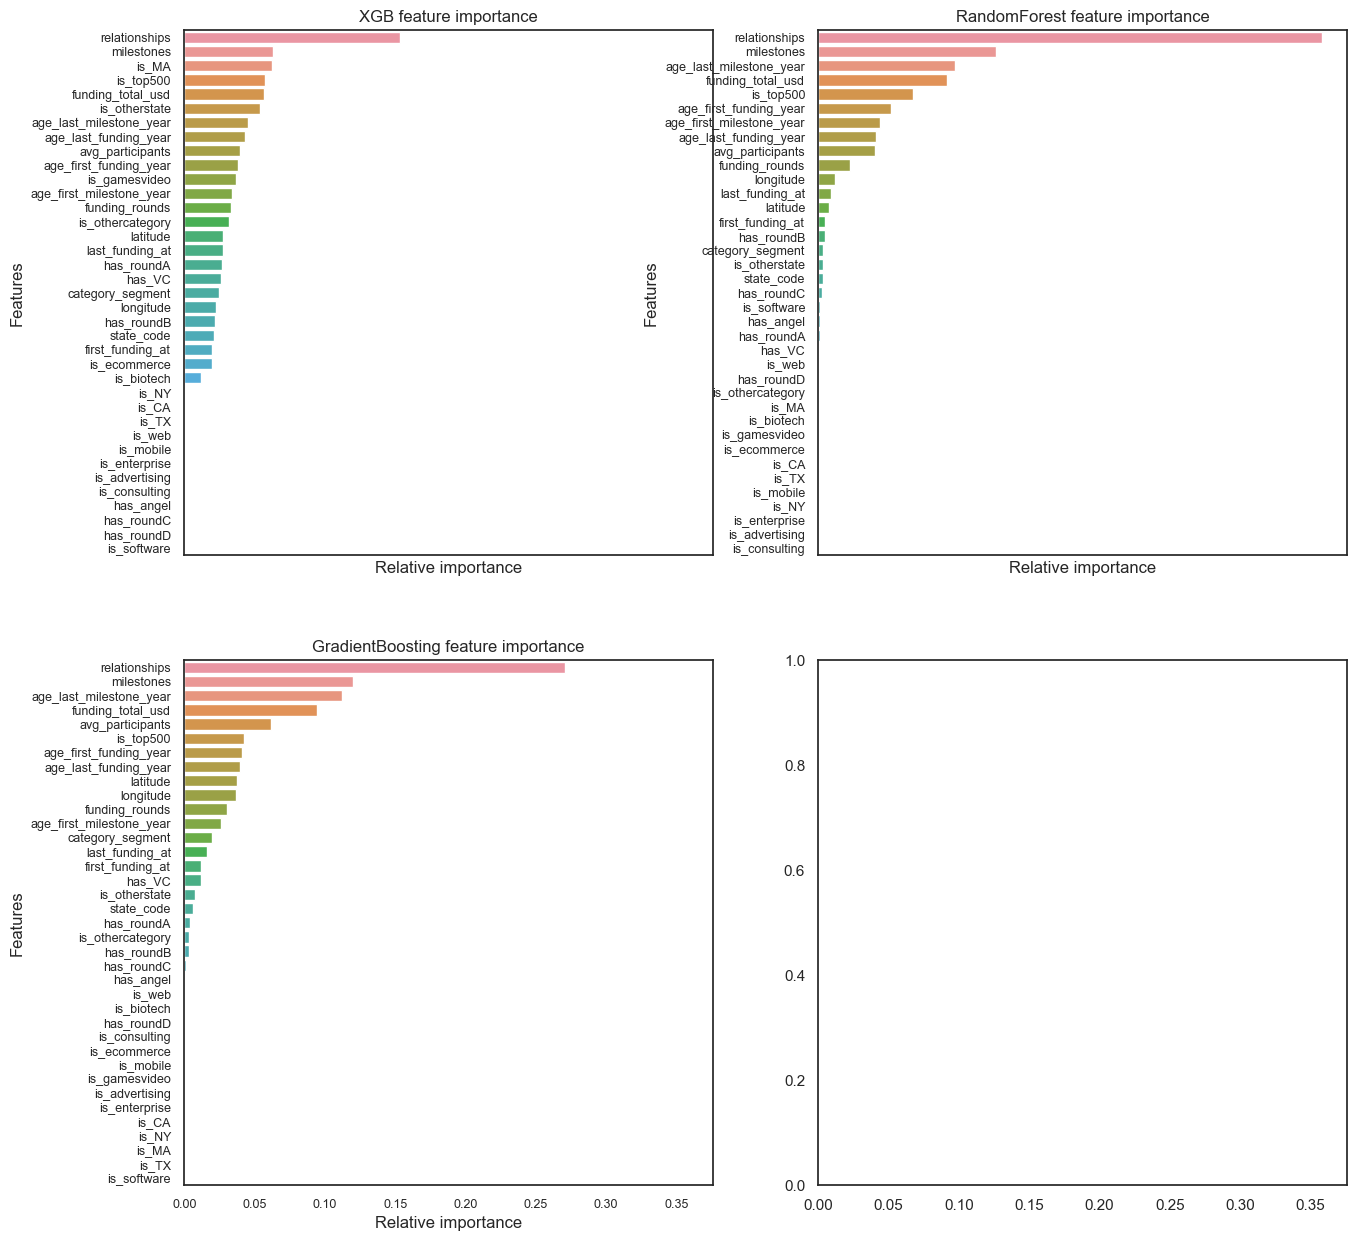

In [185]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("XGB",XGB_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = (names_classifiers[nclassifier][0])
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1
        




In [182]:
test_is_acquired_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_is_acquired_XGB = pd.Series(XGB_best.predict(X_test), name="XGB")

test_is_acquired_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")

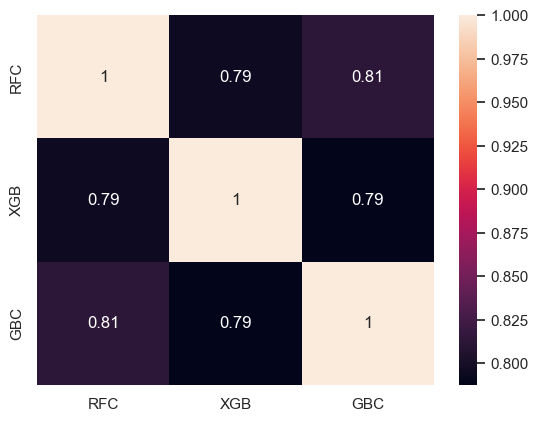

In [183]:
ensemble_results = pd.concat([test_is_acquired_RFC,test_is_acquired_XGB,test_is_acquired_GBC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

Ensemble modeling-COMBINING MODELS

In [186]:
#voting Classifier:
 
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('xgb', XGB_best)
,('gbc',GBC_best)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_train, y_train)

#stacking
def stacking(classifiers, X_train, X_test, y_train, y_test):
    all_estimators = []
    for classifier in classifiers:
        all_estimators.append((str(classifier), classifier))
    stack = StackingClassifier(estimators=all_estimators, final_estimator=GBC_best)
    score= stack.fit(X_train, y_train).score(X_test, y_test)
   
    return score

In [187]:
test_is_acquired = pd.Series(votingC.predict(X_test), name="is_acquired")

results = pd.concat([test_is_acquired],axis=1)

score= f1_score(y_test, results, average='macro')

stacking_score = stacking(best_classifiers, X_train, X_test, y_train, y_test)

print(f'the voting score is: {score}')

print(f'the stacking score is: {stacking_score} ') 

the voting score is: 0.7361647361647361
the stacking score is: 0.7891891891891892 
